<p style='text-align: center; font-size: 50px; background-color: #f0ad4e; padding: 12px;'><b>ANALYSIS OF CRIME DATA</b></p>




<div style="background-color: #dcedc8; color: #2e7d32; padding: 10px;">
    <h3>Contents</h3>
    <ul>
        <li>Overview Of the data</li>
        <li>Creating a connection between Mysql and Python</li>
        <li>Importing important Libraries</li>
        <li>Converting SQL Data into Pandas DataFrame</li>
        <li>Exploring Data via graphs, mathematical functions, etc.</li>
        <li>Answering the relevant questions as per the Problem Statements</li>
        <li>Getting into the conclusion</li>
    </ul>
</div>


# Overview Of the Data

   This dataset provides a detailed compilation of crime reports, offering insights into various aspects of reported incidents.    It includes information about the time and location of the crimes, details about the victims, and descriptions of the            offenses. This dataset can be instrumental in understanding crime patterns and assisting in law enforcement and public safety    efforts.
   
   
   
   
   DR_NO = Unique Numeric code representing the crime in a division
   
   Date_Rptd = Date when the crime was reported
   
   DATE_OCC = Actual date and time when the crime occurred
   
   AREA_NAME = Name of the area where the crime occurred
   
   Crm_Cd = Numeric code representing the type of crime
   
   Crm_Cd_Desc = Detailed description of the crime
   
   Vict_Age = Age of the victim
   
   Vict_Sex = Gender of the victim
   
   Premis_Desc	= Description of the premise where crime occurred
   
   Status = Status of the crime report [AO,AA,IC,JO]
   
   Location = General location description of the crime
   
   LAT = Latitude coordinate of the crime location
   
   LON = Longitude coordinate of the crime location
   
   


# Installing PyMySql

In [1]:
#pip install pymysql

In [2]:
import pymysql

# Connect to the database
connection = pymysql.connect(host='localhost',
                             user='root',
                             password="123456789",
                             database='crime_dataset'
                             )


# Importing Important Libraries

In [3]:
import pandas as pd                                       #for data exploration
import numpy as np                                        #for mathematical calculations
import matplotlib.pyplot as plt                           #for graphs
import seaborn as sns                                     #for advanced EDA
import plotly.express as px                               #for map pointing

# Converting the database information into Dataframe 

In [4]:
df = pd.read_sql_query("Select * from crime_data",connection,parse_dates=True)

C:\Users\ricky\AppData\Local\Temp\ipykernel_17872\360726825.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("Select * from crime_data",connection,parse_dates=True)


In [5]:
df

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,190101086,01-02-2020,01-01-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40
3,191921269,01-01-2020,01-01-2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
4,200100502,01-02-2020,01-02-2020,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,200106614,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,33,M,SIDEWALK,IC,2400 ELLENDALE PL,34.05,-118.26
495,200106615,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,39TH PL,34.05,-118.26
496,200106616,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,35,M,OTHER STORE,IC,2500 W VERNON AV,34.05,-118.25
497,200106617,02-07-2020,01-10-2020,Central,510,VEHICLE - STOLEN,0,F,PARKING LOT,IC,700 EXPOSITION BL,34.05,-118.25


# DATA EXPLORATION

  - Retrieve basic statistics on the dataset, such as the total number of records and unique values in specific columns.
  
  - Identify the distinct crime codes and their descriptions.


In [6]:
#top 5 rows


df.head()

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,190101086,01-02-2020,01-01-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40
3,191921269,01-01-2020,01-01-2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
4,200100502,01-02-2020,01-02-2020,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26


In [7]:
#last 5 rows

df.tail()

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
494,200106614,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,33,M,SIDEWALK,IC,2400 ELLENDALE PL,34.05,-118.26
495,200106615,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,39TH PL,34.05,-118.26
496,200106616,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,35,M,OTHER STORE,IC,2500 W VERNON AV,34.05,-118.25
497,200106617,02-07-2020,01-10-2020,Central,510,VEHICLE - STOLEN,0,F,PARKING LOT,IC,700 EXPOSITION BL,34.05,-118.25
498,200106618,02-07-2020,02-03-2020,Central,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),72,M,"VEHICLE, PASSENGER/TRUCK",IC,2600 S FIGUEROA ST,34.05,-118.24


In [8]:
#information of the values and its type

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DR_NO        499 non-null    int64  
 1   Date_Rptd    499 non-null    object 
 2   DATE_OCC     499 non-null    object 
 3   AREA_NAME    499 non-null    object 
 4   Crm_Cd       499 non-null    int64  
 5   Crm_Cd_Desc  499 non-null    object 
 6   Vict_Age     499 non-null    int64  
 7   Vict_Sex     499 non-null    object 
 8   Premis_Desc  499 non-null    object 
 9   Status       499 non-null    object 
 10  Location     499 non-null    object 
 11  LAT          499 non-null    float64
 12  LON          499 non-null    float64
dtypes: float64(2), int64(3), object(8)
memory usage: 50.8+ KB
None


In [9]:
#statistical information of the dataset

print(df.describe())

              DR_NO      Crm_Cd    Vict_Age         LAT         LON
count  4.990000e+02  499.000000  499.000000  499.000000  499.000000
mean   1.999930e+08  504.178357   32.142285   34.047335 -118.261283
std    8.742243e+06  198.381863   20.202136    0.053840    0.041560
min    1.030447e+07  210.000000    0.000000   33.710000 -118.560000
25%    2.001044e+08  330.000000   23.000000   34.040000 -118.260000
50%    2.001048e+08  442.000000   31.000000   34.050000 -118.250000
75%    2.001064e+08  624.000000   46.500000   34.050000 -118.240000
max    2.220130e+08  956.000000   78.000000   34.280000 -118.190000


In [10]:
#Area onto which most crime has happened-using sql query

print(pd.read_sql_query('''
SELECT AREA_NAME, COUNT(*) AS Count
from crime_data
group by AREA_NAME
order by Count desc;
''',connection))

      AREA_NAME  Count
0       Central    423
1        Harbor     12
2     Northeast     12
3       Rampart      8
4     Hollywood      6
5      Wilshire      5
6       West LA      5
7   77th Street      5
8     Southwest      4
9      Van Nuys      4
10   Hollenbeck      4
11  N Hollywood      2
12     Foothill      2
13  West Valley      2
14      Mission      1
15      Pacific      1
16      Olympic      1
17   Devonshire      1
18    Southeast      1


C:\Users\ricky\AppData\Local\Temp\ipykernel_17872\2772750646.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  print(pd.read_sql_query('''


In [11]:
#using pandas also we can do the same
print(df["AREA_NAME"].value_counts())

Central        423
Northeast       12
Harbor          12
Rampart          8
Hollywood        6
77th Street      5
Wilshire         5
West LA          5
Southwest        4
Hollenbeck       4
Van Nuys         4
Foothill         2
West Valley      2
N Hollywood      2
Pacific          1
Mission          1
Olympic          1
Devonshire       1
Southeast        1
Name: AREA_NAME, dtype: int64


In [12]:
#Unique Crime codes

print(df["Crm_Cd"].unique())

[624 745 740 442 946 341 330 930 648 354 230 761 350 310 480 623 440 510
 210 900 888 420 886 421 647 940 662 220 625 755 649 901 320 890 351 956
 820 812 920 850 666 343]


In [13]:
#Number of Unique Crime codes using sql query


print(pd.read_sql_query('''
SELECT count(distinct Crm_cd) as No_of_crime_code
from crime_data
;
''',connection))



   No_of_crime_code
0                42


C:\Users\ricky\AppData\Local\Temp\ipykernel_17872\2598763622.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  print(pd.read_sql_query('''


In [14]:
#getting the Unique crime description name using sql query

print(pd.read_sql_query('''
SELECT distinct Crm_Cd_Desc as Crime_description
FROM crime_data
;
''',connection))

                                    Crime_description
0                            BATTERY - SIMPLE ASSAULT
1            VANDALISM - MISDEAMEANOR ($399 OR UNDER)
2   VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...
3            SHOPLIFTING - PETTY THEFT ($950 & UNDER)
4                           OTHER MISCELLANEOUS CRIME
5   THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...
6                               BURGLARY FROM VEHICLE
7              CRIMINAL THREATS - NO WEAPON DISPLAYED
8                                               ARSON
9                                   THEFT OF IDENTITY
10     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
11                                    BRANDISH WEAPON
12                                      THEFT, PERSON
13                                           BURGLARY
14                                      BIKE - STOLEN
15                            BATTERY POLICE (SIMPLE)
16                 THEFT PLAIN - PETTY ($950 & UNDER)
17                          

C:\Users\ricky\AppData\Local\Temp\ipykernel_17872\1186284132.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  print(pd.read_sql_query('''


In [15]:
#No of Unique Crime Description

print("No of Unique Crime Descripton-",df["Crm_Cd_Desc"].unique().size)

No of Unique Crime Descripton- 42


In [16]:
#Top 10 Crime_DESCRIPTION along with their code-using sql query

print(pd.read_sql_query('''
SELECT Crm_Cd_Desc, Crm_Cd,COUNT(*) AS Count
from crime_data
group by Crm_Cd_Desc,Crm_Cd
order by Count DESC
LIMIT 10;

;
''',connection))







                                         Crm_Cd_Desc  Crm_Cd  Count
0                              BURGLARY FROM VEHICLE     330     82
1                           BATTERY - SIMPLE ASSAULT     624     74
2                 THEFT PLAIN - PETTY ($950 & UNDER)     440     44
3           SHOPLIFTING - PETTY THEFT ($950 & UNDER)     442     28
4                                   VEHICLE - STOLEN     510     28
5  THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...     341     26
6     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT     230     24
7           VANDALISM - MISDEAMEANOR ($399 OR UNDER)     745     23
8  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...     740     23
9                                        TRESPASSING     888     19


C:\Users\ricky\AppData\Local\Temp\ipykernel_17872\3133433506.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  print(pd.read_sql_query('''


In [17]:
# Alternatively we can use pandas for this


# Top 10 crime description happening


top_10_crime = df["Crm_Cd_Desc"].value_counts().head(10)
crime_codes = df.groupby('Crm_Cd_Desc')['Crm_Cd'].unique().apply(lambda x: x[0]).loc[top_10_crime.index]

result = pd.DataFrame({'Crime_Description': top_10_crime.index, 'Crime_Code': crime_codes.values, 'Count': top_10_crime.values})
print(result)

                                   Crime_Description  Crime_Code  Count
0                              BURGLARY FROM VEHICLE         330     82
1                           BATTERY - SIMPLE ASSAULT         624     74
2                 THEFT PLAIN - PETTY ($950 & UNDER)         440     44
3           SHOPLIFTING - PETTY THEFT ($950 & UNDER)         442     28
4                                   VEHICLE - STOLEN         510     28
5  THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...         341     26
6     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT         230     24
7  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...         740     23
8           VANDALISM - MISDEAMEANOR ($399 OR UNDER)         745     23
9                                        TRESPASSING         888     19


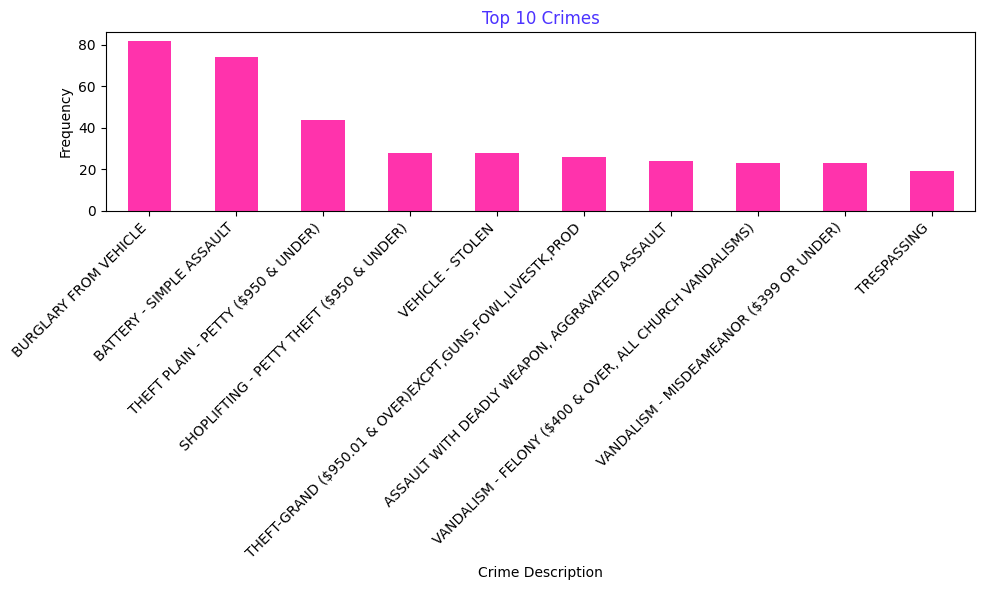

In [18]:
#Graphical Representation of the Top 10 Crimes


plt.figure(figsize=(10,6))
top_10_crimes=df["Crm_Cd_Desc"].value_counts().head(10)
top_10_crimes.plot(kind="bar",color="#FF33AC")

plt.xlabel("Crime Description")
plt.ylabel("Frequency")
plt.title("Top 10 Crimes",color="#4C33FF")
plt.xticks(rotation=45,ha="right")
plt.tight_layout()

plt.show()


#Notes-Rotation helps to prevent overlapping of desc and ha=horizontal alignment towards right

# TEMPORAL ANALYSIS

- Analyze the temporal aspects of the data.

- Determine trends in crime occurrence over time.



In [19]:
df[["DATE_OCC","Date_Rptd"]]

,DATE_OCC,Date_Rptd
0,01-08-2020,01-08-2020
1,01-01-2020,01-02-2020
2,01-01-2020,01-01-2020
3,01-01-2020,01-01-2020
4,01-02-2020,01-02-2020
...,...,...
494,02-07-2020,02-07-2020
495,02-07-2020,02-07-2020
496,02-07-2020,02-07-2020
497,01-10-2020,02-07-2020


In [20]:
df["New_Date_Rptd"]= pd.to_datetime(df["Date_Rptd"])

In [21]:
df["New_DATE_OCC"] = pd.to_datetime(df["DATE_OCC"])
df.head()

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON,New_Date_Rptd,New_DATE_OCC
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30,2020-01-08,2020-01-08
1,190101086,01-02-2020,01-01-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25,2020-01-02,2020-01-01
2,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40,2020-01-01,2020-01-01
3,191921269,01-01-2020,01-01-2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45,2020-01-01,2020-01-01
4,200100502,01-02-2020,01-02-2020,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26,2020-01-02,2020-01-02


In [22]:
df["Crime_Month"]=df["New_Date_Rptd"].dt.to_period("M")

In [23]:
per_month_reports = df["Crime_Month"].value_counts().sort_index()
per_month_reports



2020-01    309
2020-02    134
2020-03      4
2020-04      5
2020-05      5
2020-06      5
2020-07      3
2020-08      3
2020-09      4
2020-10      4
2020-11      6
2020-12      9
2021-01      1
2021-03      1
2021-04      1
2021-11      1
2021-12      2
2022-02      1
2022-08      1
Freq: M, Name: Crime_Month, dtype: int64

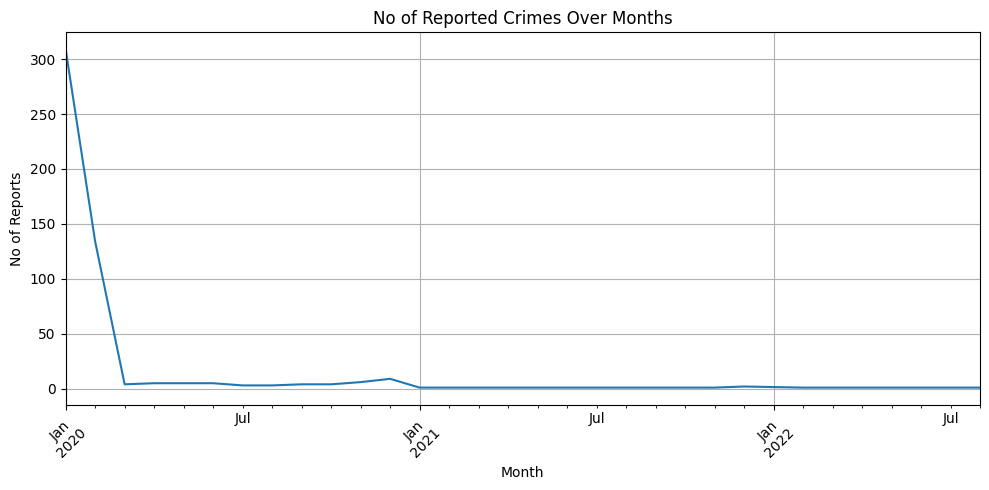

In [24]:
#Graphical Representation of the Crimes_Reported Per Month for the year-2020,2021,2022

plt.figure(figsize=(10,5))
per_month_reports.plot(kind='line')
plt.title('No of Reported Crimes Over Months')
plt.xlabel('Month')
plt.ylabel('No of Reports')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


#hence January and February -2020 has the more number of reported crimes as compared to other years(2021,2022)

In [25]:
#Calculating the average time gap between crimes occured and reported

df["Time_Gap"]= df["New_Date_Rptd"]-df["New_DATE_OCC"]
average_time = df["Time_Gap"].mean()

print("The average time of the crimes reported= ",average_time)

The average time of the crimes reported=  6 days 20:49:32.344689378


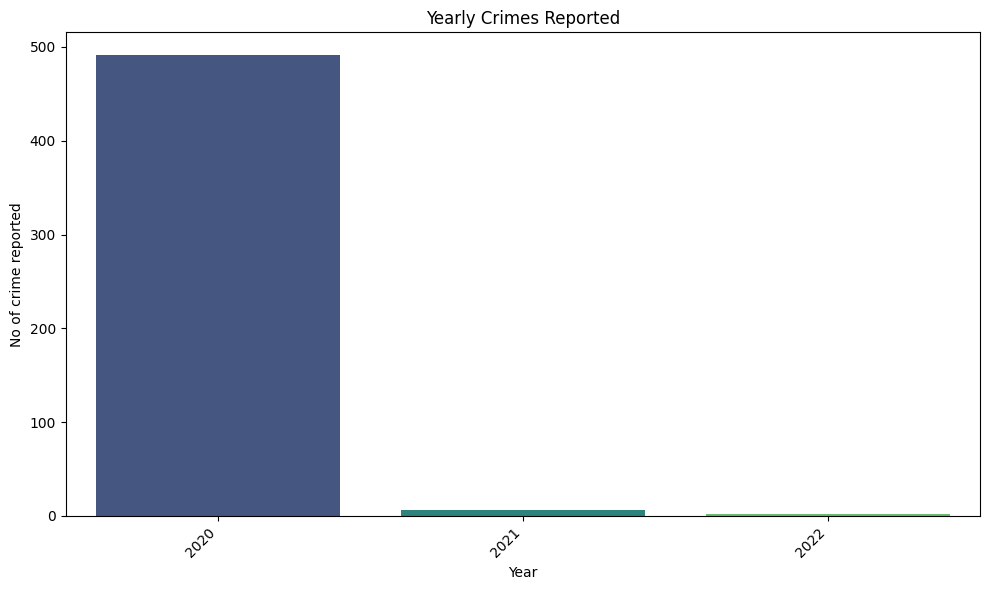

In [26]:
#Graphical respresntation of the year on which the crime_reported was more-Using Seaborn

yearly_crime_reported = df["New_Date_Rptd"].dt.year.value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.barplot(x=yearly_crime_reported.index, y=yearly_crime_reported.values, palette='viridis')
plt.xlabel("Year")
plt.ylabel("No of crime reported")
plt.title("Yearly Crimes Reported")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [27]:
#Crime Description as per the date_reported

df[["Crm_Cd_Desc","New_Date_Rptd"]].value_counts()

Crm_Cd_Desc                     New_Date_Rptd
BATTERY - SIMPLE ASSAULT        2020-01-11       9
BURGLARY FROM VEHICLE           2020-01-12       8
                                2020-01-04       7
BATTERY - SIMPLE ASSAULT        2020-01-02       7
BURGLARY FROM VEHICLE           2020-01-11       7
                                                ..
OTHER MISCELLANEOUS CRIME       2020-01-04       1
                                2020-01-09       1
                                2020-01-12       1
                                2020-02-07       1
VIOLATION OF RESTRAINING ORDER  2020-11-07       1
Length: 280, dtype: int64

# SPATIAL ANALYSIS
   
   - Utilize the geographical information (Latitude and Longitude) to perform spatial analysis.

   - Visualize crime hotspots on a map.



<div style="background-color: #ffeeba; padding: 10px;">
    <h3 style="color: #856404;">Question 1</h3>
    <ul>
        <li><strong>Where are the geographical hotspots for reported crimes?</strong></li>
        <li><strong>Where do most crimes occur based on the "Location" column?</strong></li>
    </ul>
</div>


<font color='blue'><strong>Answer:</strong></font>

- **Where are the geographical hotspots for reported crimes?**

    As per the map its evident that the crimes taken place is in Los Angeles.Hence,
    
     The Top 10 Geographical Hot spots for reported crimes are-
    
        Central      -  423
        Northeast    -   12
        Harbor       -   12
        Rampart      -    8
        Hollywood    -    6
        77th Street  -    5
        Wilshire     -    5
        West LA      -    5
        Southwest    -    4
        Hollenbeck   -    4
        
        Name: AREA_NAME, dtype: int64





- **Where do most crimes occur based on the "Location" column??**
       
       Most Crime has occured in the "800 N ALAMEDA" ST of Los Angeles

The following below codes provides further details:


In [28]:
#Top 10 Location where the crimes has occurred-  Using SQL Query


pd.read_sql_query('''
SELECT Location, COUNT(*) AS CrimeCount
FROM crime_data
GROUP BY Location
ORDER BY CrimeCount DESC
LIMIT 10;
;
''',connection)

C:\Users\ricky\AppData\Local\Temp\ipykernel_17872\2140196719.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query('''


,Location,CrimeCount
0,800 N ALAMEDA ST,14
1,700 W 7TH ST,11
2,300 E 5TH ST,6
3,1100 S FIGUEROA ST,6
4,6TH,6
5,600 S SPRING ST,5
6,100 E 5TH ST,5
7,7TH ST,5
8,500 S SAN PEDRO ST,5
9,800 W OLYMPIC BL,4


In [29]:
#To see what are the specific crimes taken place in the top 10 crime locations

most_common_locations = df['Location'].value_counts().head(10).index.tolist()

for location in most_common_locations:
    crimes_at_location = df[df['Location'] == location]['Crm_Cd_Desc'].unique()
    print(f"Location: {location}")
    print(f"Crimes Reported: {crimes_at_location}\n")


Location: 800 N ALAMEDA ST
Crimes Reported: ['BURGLARY FROM VEHICLE' 'THEFT OF IDENTITY'
 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)'
 'BATTERY - SIMPLE ASSAULT' 'VEHICLE - STOLEN'
 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)' 'ROBBERY' 'ORAL COPULATION']

Location: 700 W 7TH ST
Crimes Reported: ['THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD'
 'BATTERY - SIMPLE ASSAULT' 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)'
 'BURGLARY' 'BURGLARY FROM VEHICLE' 'THEFT PLAIN - PETTY ($950 & UNDER)'
 'BIKE - STOLEN' 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT']

Location: 1100 S FIGUEROA ST
Crimes Reported: ['BURGLARY FROM VEHICLE' 'THEFT OF IDENTITY' 'ROBBERY'
 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)']

Location: 300 E 5TH ST
Crimes Reported: ['TRESPASSING' 'BATTERY - SIMPLE ASSAULT' 'BURGLARY FROM VEHICLE'
 'DOCUMENT FORGERY / STOLEN FELONY' 'THEFT, PERSON'
 'THEFT PLAIN - PETTY ($950 & UNDER)']

Location: 6TH
Crimes Reported: ['BURGLARY' 'THEFT FROM MOTO

In [30]:
#Getting hotspots on the map as per the crime description-Using Plotly-express

fig = px.scatter_mapbox(
    df,
    lat='LAT',
    lon='LON',
    hover_name='Crm_Cd_Desc',  
    mapbox_style='carto-darkmatter',
    zoom=10  )

fig.update_layout(
    title='Crime Locations',
    margin=dict(l=0, r=0, t=30, b=0)  
)

fig.show()


In [31]:
#Central has the most committed crimes in LosAngeles


df["AREA_NAME"].value_counts()

Central        423
Northeast       12
Harbor          12
Rampart          8
Hollywood        6
77th Street      5
Wilshire         5
West LA          5
Southwest        4
Hollenbeck       4
Van Nuys         4
Foothill         2
West Valley      2
N Hollywood      2
Pacific          1
Mission          1
Olympic          1
Devonshire       1
Southeast        1
Name: AREA_NAME, dtype: int64

In [32]:
#Specific crimes occured in Central

df[df["AREA_NAME"]=="Central"][["AREA_NAME","Crm_Cd_Desc"]]

,AREA_NAME,Crm_Cd_Desc
1,Central,BATTERY - SIMPLE ASSAULT
4,Central,SHOPLIFTING - PETTY THEFT ($950 & UNDER)
5,Central,OTHER MISCELLANEOUS CRIME
6,Central,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI..."
7,Central,BURGLARY FROM VEHICLE
...,...,...
494,Central,BATTERY - SIMPLE ASSAULT
495,Central,BATTERY - SIMPLE ASSAULT
496,Central,BATTERY - SIMPLE ASSAULT
497,Central,VEHICLE - STOLEN


In [33]:
#Moslty Occured Crime IN Central-Los Angeles


df[df["AREA_NAME"]=="Central"][["AREA_NAME","Crm_Cd_Desc"]].mode()

,AREA_NAME,Crm_Cd_Desc
0,Central,BURGLARY FROM VEHICLE


In [34]:
#finding the number of times the BURGLARY FROM VEHICLE has happened in Central


crime_description = 'BURGLARY FROM VEHICLE'

central_crime = df[df['AREA_NAME'] == 'Central']
specific_crime_count = central_crime[central_crime['Crm_Cd_Desc'] == crime_description].shape[0]

print(f"The number of occurrences of '{crime_description}' in 'Central' area: {specific_crime_count}")


The number of occurrences of 'BURGLARY FROM VEHICLE' in 'Central' area: 79


<div style="background-color: #ffeeba; padding: 10px;">
    <h3 style="color: #1f497d;">Question 2</h3>
    <p><strong>What is the distribution of reported crimes based on Crime Code?</strong></p>
</div>



<font color='blue'><strong>Answer:</strong></font>

- **What is the distribution of reported crimes based on Crime Code?**
    
    As per the graph there are 42 unique crime codes out of which the most commited crime code is 330 -whose crime description is BURGLARY FROM VEHICLE, which is the most commited crime as per the previous analysis
    
    
The following below codes provides further details:



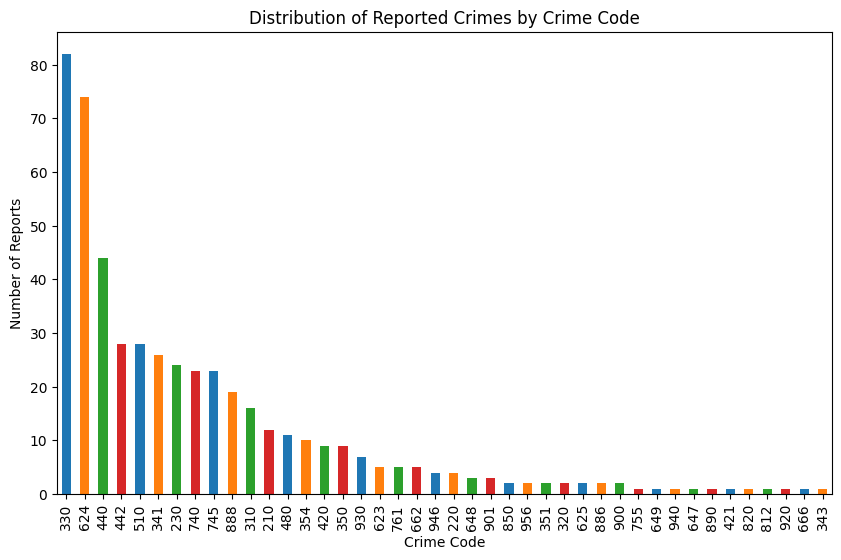

In [35]:
#Graphical Representation of the crime code distribution 

plt.figure(figsize=(10, 6))
crime_code_counts = df['Crm_Cd'].value_counts()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  

crime_code_counts.plot(kind='bar', color=colors)
plt.title('Distribution of Reported Crimes by Crime Code')
plt.xlabel('Crime Code')
plt.ylabel('Number of Reports')
plt.show()


# VICTIMS DEMOGRAPHICS

      
 - Investigate the distribution of victim ages and genders.
 
 - Identify common premises descriptions where crimes occur.

<div style="background-color: #ffeeba; padding: 10px;">
    <h3 style="color: #856404;">Question 3</h3>
    <ul>
        <li><strong>What is the distribution of victim ages in reported crimes?</strong></li>
        <li><strong>Is there a significant difference in crime rates between male and female victims?</strong></li>
    </ul>
</div>


<font color='blue'><strong>Answer:</strong></font>

- **What is the distribution of victim ages in reported crimes?**
    - The distribution of Vict_Age ranges from 0 to 78.

- **Is there a significant difference in crime rates between male and female victims?**
    - Yes, there is a significant difference in crime rates between male and female victims. Approximately 63% of the reported crimes involve male victims, 31% involve female victims, and 5.4% are unspecified gender.

The following below codes provides further details:





In [36]:
#Minimum age of the victim
df["Vict_Age"].min()

0

In [37]:
#maximum age of the victim
df["Vict_Age"].max()

78

In [38]:
# Replacing empty strings with 'Unknown'

df['Vict_Sex'].replace('', 'Unknown', inplace=True)


In [39]:
#Replacing X-gender with the mode of 'Vict_Sex'


mode_gender = df['Vict_Sex'].mode()[0] 

df['Vict_Sex'].replace('X', mode_gender, inplace=True)


In [40]:
#to see the number of victims in respect of their gender

df["Vict_Sex"].value_counts()

M          317
F          155
Unknown     27
Name: Vict_Sex, dtype: int64

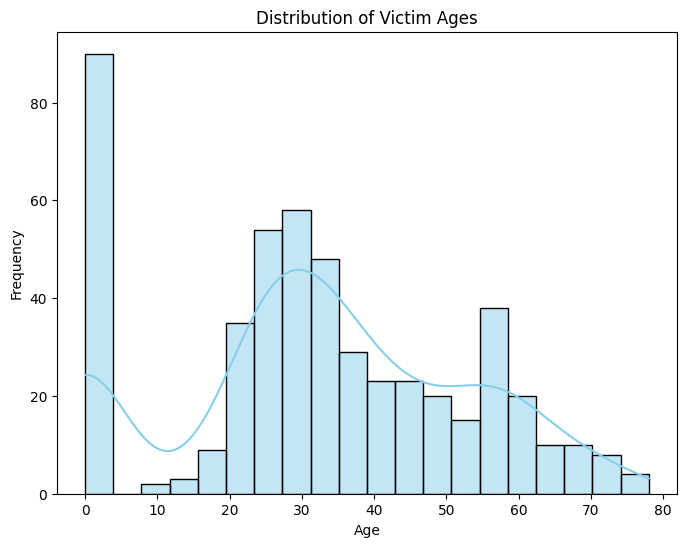

In [41]:
# Distribution of victim ages using a histogram


plt.figure(figsize=(8, 6))
sns.histplot(df['Vict_Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Victim Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



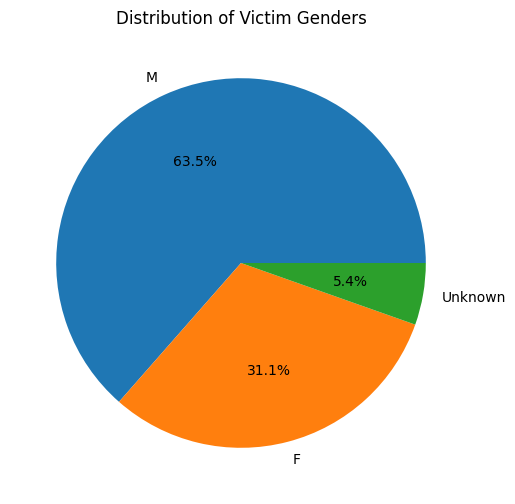

In [42]:
# Distribution of victim genders as per their percentage

plt.figure(figsize=(6, 6))
df['Vict_Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Distribution of Victim Genders')
plt.ylabel('')  
plt.show()

In [43]:
#Finding the Premise description for the crimes happend to age = 0 (assuming it to be an infant)

df[df["Vict_Age"]==0][["Crm_Cd_Desc","Premis_Desc"]].mode()

,Crm_Cd_Desc,Premis_Desc
0,VEHICLE - STOLEN,STREET


In [44]:
# Identifing common premises descriptions where crimes occur

common_premises = df['Premis_Desc'].value_counts().head(10)
print("Top 10 Common Premises Descriptions:")
print(common_premises)


Top 10 Common Premises Descriptions:
STREET                                          105
SIDEWALK                                         62
PARKING LOT                                      46
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     45
SINGLE FAMILY DWELLING                           25
VEHICLE, PASSENGER/TRUCK                         21
OTHER BUSINESS                                   19
DEPARTMENT STORE                                 17
OTHER STORE                                      14
LA UNION STATION (NOT LINE SPECIFIC)             13
Name: Premis_Desc, dtype: int64


# STATUS ANALYSIS

   - Examine the status of reported crimes.
   - Classify crimes based on their current status.



In [45]:
#Type of status present

df["Status"].unique()

array(['AO', 'IC', 'AA', 'JO'], dtype=object)

In [46]:
#CRIMES BASED ON THEIR CURRENT STATUS -AO[Arrests for Offence]


df[df["Status"]=="AO"]["Crm_Cd_Desc"]

print("Crimes for AO status are: \n",df[df["Status"]=="AO"]["Crm_Cd_Desc"])
print()
print("\nTotal no of AO crimes as per crime code description: ",df[df["Status"]=="AO"]["Crm_Cd_Desc"].size)

Crimes for AO status are: 
 0                               BATTERY - SIMPLE ASSAULT
17                                       BRANDISH WEAPON
47                                               ROBBERY
67              VANDALISM - MISDEAMEANOR ($399 OR UNDER)
89                                  DISTURBING THE PEACE
121                            OTHER MISCELLANEOUS CRIME
129                                            EXTORTION
214                       VIOLATION OF RESTRAINING ORDER
299                                              ROBBERY
316                            OTHER MISCELLANEOUS CRIME
318                                BURGLARY FROM VEHICLE
329                                      ORAL COPULATION
335                                 DISTURBING THE PEACE
341    CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...
342                                     VEHICLE - STOLEN
352       ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
355       ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
357

In [47]:
#CRIMES BASED ON THEIR CURRENT STATUS -AA[Attempted Assault]

df[df["Status"]=="AA"]["Crm_Cd_Desc"]

print("Crimes for AA status are: \n" ,df[df["Status"]=="AA"]["Crm_Cd_Desc"])
print()
print("\nTotal no of AA crimes as per crime code description: ",df[df["Status"]=="AA"]["Crm_Cd_Desc"].size)

Crimes for AA status are: 
 9      THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...
14        ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
46                              VIOLATION OF COURT ORDER
55        ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
70     VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...
83                                               ROBBERY
114    VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...
115                                              ROBBERY
128       ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
177                                        THEFT, PERSON
206                                        BIKE - STOLEN
212                     DOCUMENT FORGERY / STOLEN FELONY
213                                              ROBBERY
223                                              ROBBERY
237                                             BURGLARY
240                                    ATTEMPTED ROBBERY
250    VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...
287

In [48]:
#CRIMES BASED ON THEIR CURRENT STATUS -IC[Incident Code]

df[df["Status"]=="IC"]["Crm_Cd_Desc"]

print("Crimes for IC status are: \n" ,df[df["Status"]=="IC"]["Crm_Cd_Desc"])
print()
print("\nTotal no of IC crimes as per crime code description: ",df[df["Status"]=="IC"]["Crm_Cd_Desc"].size)

Crimes for IC status are: 
 1                               BATTERY - SIMPLE ASSAULT
2               VANDALISM - MISDEAMEANOR ($399 OR UNDER)
3      VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...
4               SHOPLIFTING - PETTY THEFT ($950 & UNDER)
5                              OTHER MISCELLANEOUS CRIME
                             ...                        
494                             BATTERY - SIMPLE ASSAULT
495                             BATTERY - SIMPLE ASSAULT
496                             BATTERY - SIMPLE ASSAULT
497                                     VEHICLE - STOLEN
498             VANDALISM - MISDEAMEANOR ($399 OR UNDER)
Name: Crm_Cd_Desc, Length: 447, dtype: object


Total no of IC crimes as per crime code description:  447


In [49]:
#CRIMES BASED ON THEIR CURRENT STATUS -JO[Juvinile Offence]

df[df["Status"]=="JO"]["Crm_Cd_Desc"]

print("Crimes for JO status are: \n" ,df[df["Status"]=="JO"]["Crm_Cd_Desc"])
print()
print("\nTotal no of JO crimes as per crime code description: ",df[df["Status"]=="JO"]["Crm_Cd_Desc"].size)

Crimes for JO status are: 
 351    BATTERY - SIMPLE ASSAULT
Name: Crm_Cd_Desc, dtype: object


Total no of JO crimes as per crime code description:  1


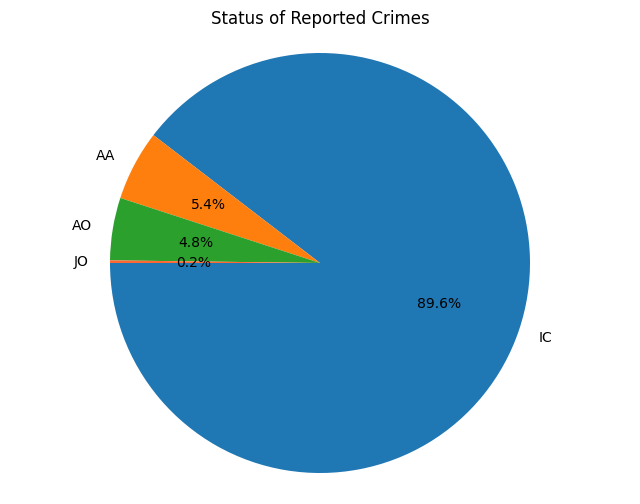

In [50]:
#GRAPHICAL REPRESENTATION OF THE CRIME_STATUS USING A PIE CHART

status_counts = df['Status'].value_counts()

custom_colors = ['skyblue', 'salmon', 'lightgreen', 'gold']  
plt.figure(figsize=(8, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e', '#2ca02c',"#FF6833"], startangle=180)
plt.title('Status of Reported Crimes')
plt.axis('equal')
plt.show()


<div style="background-color: #f9d5e5; color: #a74c92; padding: 10px;">
    <h3>Conclusion</h3>
    <ul>
        <li>As per the analysis, the Central region of Los Angeles exhibits more crime compared to other regions. Increased law enforcement is required in that area to mitigate these crimes.</li>
        <li>Common crimes in LA include Burglary from Vehicle, Battery - Simple Assault, Theft Plain - Petty, Shoplifting - Petty Theft, and Vehicle - Stolen. Preventive measures and targeted enforcement strategies are necessary to address these crimes.</li>
        <li>There is a noticeable decrease in reported crimes after 2020, possibly influenced by the pandemic.</li>
        <li>Victim demographic analysis reveals that crimes primarily happen to males. Support services should be provided to assist victims in coping with crime trauma.</li>
        <li>Additionally, the analysis reveals the presence of Juvenile Offenses (JO), indicating crimes committed by minors. Counseling services should be provided to prevent future offenses by minors.</li>
    </ul>
</div>
